# P1 

## c)
Make a plot for the quantity in (a) and the quantity in (b) as a function of $S_{A}$ . Interpret the result. In particular, what happens when $S_{A}$ = 0.5? You can assume e = 0.05.

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'Prob. observing A/B when G=AB, e = 0.05 v.s. S_A')

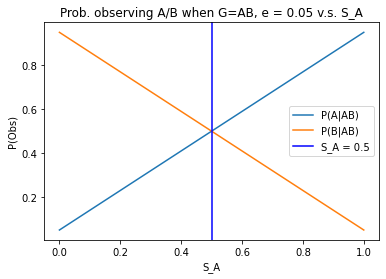

In [30]:
def PobsA_AB(S_A,err):
    return S_A + err - 2*err*S_A

def PobsB_AB(S_A,err):
    return 1 - err + 2*err*S_A - S_A #or 1 - PobsA_AB

S = np.linspace(0,1,100)
e = 0.05
ya = [PobsA_AB(sa,e) for sa in S]
yb = [PobsB_AB(sa,e) for sa in S]
plt.plot(S,ya,label = "P(A|AB)")
plt.plot(S,yb,label = "P(B|AB)")
plt.axvline(x = 0.5, color = 'b', label = 'S_A = 0.5')
plt.xlabel("S_A")
plt.legend()
plt.ylabel("P(Obs)")
plt.title("Prob. observing A/B when G=AB, e = 0.05 v.s. S_A")

- When sampling rates are the same for A and B strands (=0.5), the probabilities of observing A and B are the same given the true genotype is AB
- As the chance of sampling the A strand goes up, the probability of observing A in reads, given the true genotype is AB and the error rates are the same for A&B strands, goes up; while the probability of observing B in the reads goes down.  

## e)
Assume P(AA) = P(BB) = P(AB). Additionally, assume you observed 60 As and 40
Bs. Finally, assume e = 0.05. Plot the posterior probability as a function of $S_{A}$ and interpret the plot.

Given the assumptions and the reads, the prosterior probability of the true genotype G = AB is:  

P(AB|$O_{1}$...$O_{100}$) = $\frac{(S_{A} + 0.05 - 2 * 0.05 * S_{A})^{60} * (1 - 0.05 + 2 * 0.05 * S_{A} - S_{A})^{40}}{(S_{A} + 0.05 - 2 * 0.05 * S_{A})^{60} * (1 - 0.05 + 2 * 0.05 * S_{A} - S_{A})^{40} + 0.05^{40}*0.95^{60} + 0.05^{60}*0.95^{40}}$

Text(0.5, 1.0, 'Posterior probability of the true genotype = AB given reads')

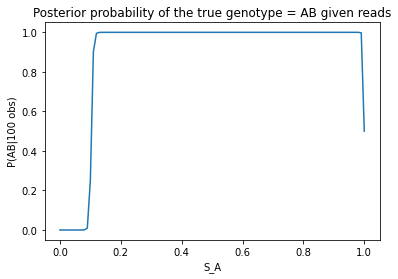

In [51]:
def post(S_A):
    ab = (S_A + 0.05 - 0.1 * S_A )**60 * (1 - 0.05 + 0.1 * S_A - S_A)**40
    aa = (0.05**40)*(0.95**60)
    bb = (0.05**60)*(0.95**40)
    return ab/(aa+ab+bb)

x = np.arange(0, 1.01, 0.01).tolist()
plt.plot(x,[post(a) for a in x])
plt.ylabel("P(AB|100 obs)")
plt.xlabel("S_A")
plt.title("Posterior probability of the true genotype = AB given reads")

- Given 60 reads are A, 40 reads are B, and the error rates = 0.05 for both A and B strands sampled, the posterior probability of the true genotype = AB rises shaprly when P(${S}$) > 0.1, then remains pretty much at 1 until the P(${S}$) goes over 0.9. 
- Intuitively, because the reads are pretty much half-and-half, and the error rates are very low, we could infer (which is what the posterior probability is doing) that the true genotype shouldn't be homozygous, unless the sampling rates are very biased. For example, if the chance of sampling B is very high if the true genotype is AB (S_A closes to 0), but we are still observing so many A in our reads tells us that the true genotype is more likely to be AA.